# Beispiel 9: a) Lineare Regression

Folgende Modelldaten beschreiben die Anreicherungen des Schadstoffs PCB in Forellen (Quelle: SCIENCE, 1972, 117, 1192-1, 193). Das Alter der Tiere findet sich in Spalte 1, die gemessene Schadstoffkonzentration (ppm) in Spalte 2:

In [1]:
PCBData=[1.00000    0.60000;
    1.00000    1.60000;
    1.00000    0.50000;
    1.00000    1.20000;
    2.00000    2.00000;
    2.00000    1.30000;
    2.00000    2.50000;
    3.00000    2.20000;
    3.00000    2.40000;
    3.00000    1.20000;
    4.00000    3.50000;
    4.00000    4.10000;
    4.00000    5.10000;
    5.00000    5.70000;
    6.00000    3.40000;
    6.00000    9.70000;
    6.00000    8.60000;
    7.00000    4.00000;
    7.00000    5.50000;
    7.00000   10.50000;
    8.00000   17.50000;
    8.00000   13.40000;
    8.00000    4.50000;
    9.00000   30.40000;
   11.00000   12.40000;
   12.00000   13.40000;
   12.00000   26.20000;
   12.00000    7.40000;];












The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.




































### Visualisierung 
a) Darstellung der Originaldaten:




    axes at line 107 column 8
    newplot at line 161 column 10
    plot at line 234 column 9





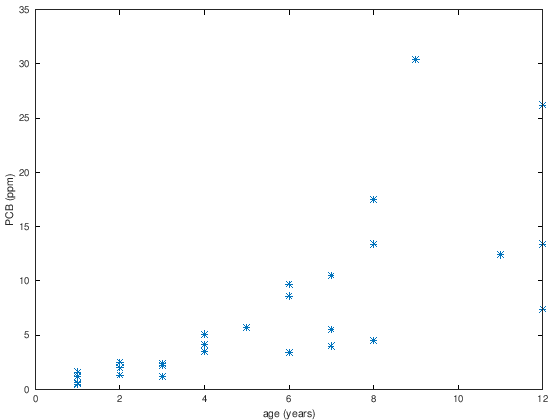

In [2]:
age = PCBData(:,1);
pcb = PCBData(:,2);
plot(age, pcb, "*" )
xlabel("age (years)")
ylabel("PCB (ppm)")


b) Nach Logarithmieren der Konzentration:

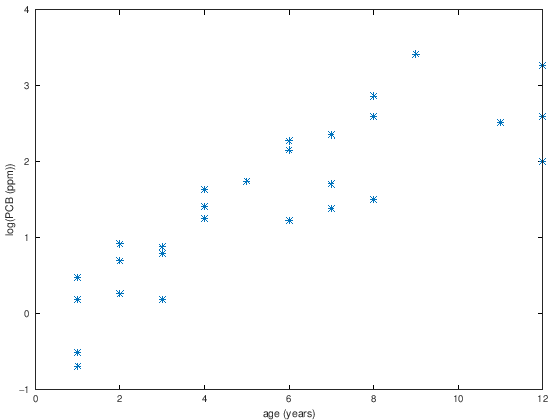

In [3]:
plot(age, log(pcb), "*" )
xlabel("age (years)")
ylabel("log(PCB (ppm))")

c) Anpassung des Alters:


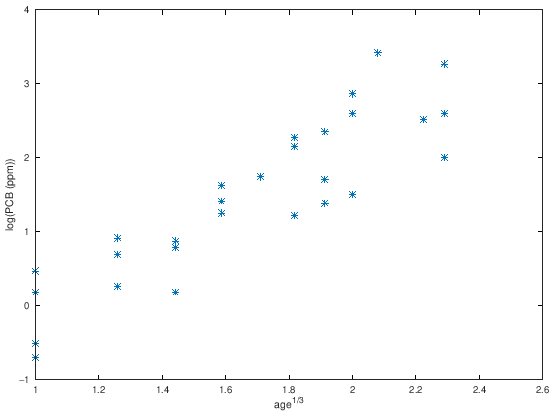

In [4]:
plot(age.^(1/3), log(pcb), "*" )
xlabel("age^{1/3}")
ylabel("log(PCB (ppm))")

## Ausgleichsproblem:

Die obige Grafik legt einen linearen Zusammenhang nahe. Für die entsprechende Ausgleichsgerade machen wir den Ansatz $$\theta_1 + \theta_2 (age)^{1/3}  \approx log (pcb) $$ und erhalten ein lineares Ausgleichsproblem der Form:
$$ A \vec \theta \approx \vec b$$


In [5]:
b = log(pcb);
n=length(b);
A=ones(n,2);
A(:,2) = age.^(1/3)
b





A =

   1.0000   1.0000
   1.0000   1.0000
   1.0000   1.0000
   1.0000   1.0000
   1.0000   1.2599
   1.0000   1.2599
   1.0000   1.2599
   1.0000   1.4422
   1.0000   1.4422
   1.0000   1.4422
   1.0000   1.5874
   1.0000   1.5874
   1.0000   1.5874
   1.0000   1.7100
   1.0000   1.8171
   1.0000   1.8171
   1.0000   1.8171
   1.0000   1.9129
   1.0000   1.9129
   1.0000   1.9129
   1.0000   2.0000
   1.0000   2.0000
   1.0000   2.0000
   1.0000   2.0801
   1.0000   2.2240
   1.0000   2.2894
   1.0000   2.2894
   1.0000   2.2894


b =

  -0.5108
   0.4700
  -0.6931
   0.1823
   0.6931
   0.2624
   0.9163
   0.7885
   0.8755
   0.1823
   1.2528
   1.4110
   1.6292
   1.7405
   1.2238
   2.2721
   2.1518
   1.3863
   1.7047
   2.3514
   2.8622
   2.5953
   1.5041
   3.4144
   2.5177
   2.5953
   3.2658
   2.0015



## Lösen der Normalengleichung:
Das obige Problem ist überbestimmt. Wir appproximieren dies nun, in dem wir eine quadratische Minimierung formulieren. Der Parametervektor $\vec \theta$, welcher die Zielfunktion  $$\Phi(\vec \theta):= \frac{1}{2}\|b- A \vec \theta\|_2^2$$ minimiert, ist die Lösung der Normalengleichung
$$A^T A \vec \theta = A^T b$$

In [6]:
theta=linsolve(A'*A, A'*b)


theta =

  -2.3907
   2.3005



## Darstellung der Lösung
Die berechnete Ausgleichsgerade wollen wir nun auch darstellen.

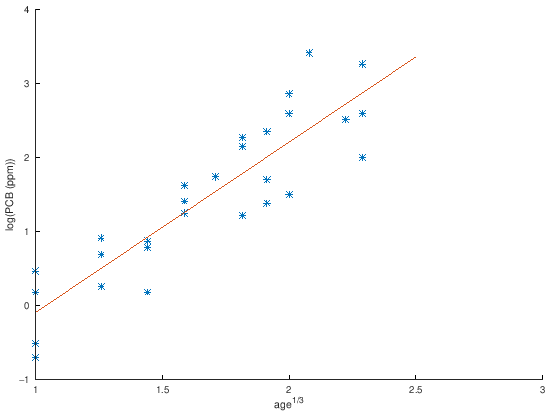

In [7]:
a =linspace(1,2.5,10);
logp = theta(1) + a*theta(2);

hold on
plot(age.^(1/3), log(pcb), "*" )
plot(a, logp)
xlabel("age^{1/3}")
ylabel("log(PCB (ppm))")

In [8]:
function energy = Energy2(theta1, theta2, A, b)
   #energy = theta1*theta1 +theta2*theta2
    energy = norm(A(:,1)*theta1 + A(:,2)*theta2  - b, 2);
    energy = 0.5*energy*energy;
end 
 energy0 = JEnergy(theta(1), theta(2), A, b)









error: 'JEnergy' undefined near line 1, column 12


In [9]:
function energy = EnergyNN(theta1, theta2, A, b)
   #energy = theta1*theta1 +theta2*theta2
    n = length(b);
    activation = ones(n,1);
    for i=1:n
        activation(i) = tanh(A(i,1)*theta1 + A(i,2)*theta2  - b(i));
    endfor
    energy = norm(activation);
    energy = 0.5*energy*energy;
end 
 energy0 = EnergyNN(theta(1), theta(2), A, b)












energy0 = 2.4431







n = 41

m = 41








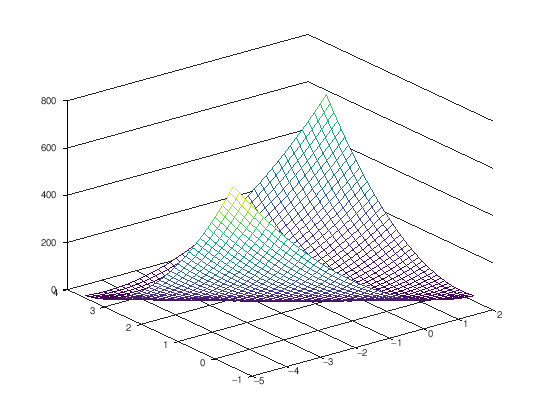

In [10]:
tx = linspace (-5, 2, 41)';
ty = linspace (-0.5, 3.5, 41)';
[xx, yy] = meshgrid (tx, ty);

n=length(tx)
m=length(ty)
for i=1:n
for j=1:m
tz(i,j) = Energy2(xx(i,j), yy(i,j), A ,b);
endfor
endfor
mesh (tx, ty, tz);



ans =

   110.1798
     1.1871



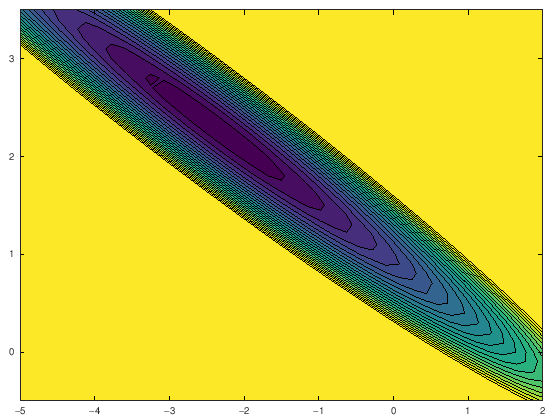

In [11]:
contourf (tx, ty, tz, 2:25)
eigs(A'*A)






n = 41

m = 41








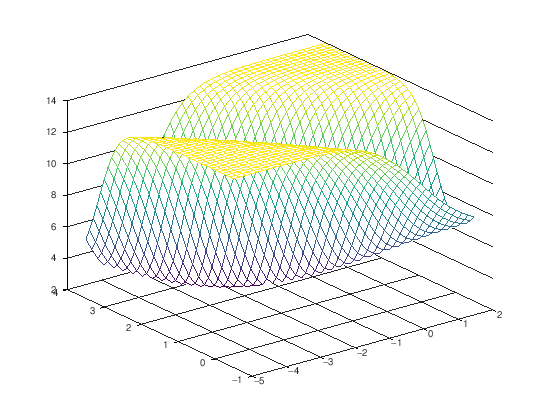

In [12]:
tx = linspace (-5, 2, 41)';
ty = linspace (-0.5, 3.5, 41)';
[xx, yy] = meshgrid (tx, ty);

n=length(tx)
m=length(ty)
for i=1:n
for j=1:m
tnn(i,j) = EnergyNN(xx(i,j), yy(i,j), A ,b);
endfor
endfor
mesh (tx, ty, tnn);

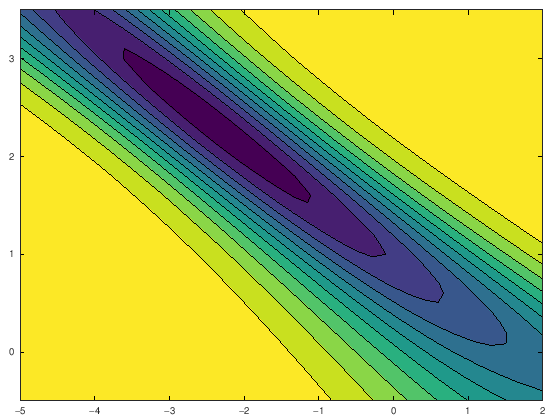

In [13]:
contourf (tx, ty, tnn, 2:25)